HEAD OF THE DATASET
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
INFO OF THE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 

<ipython-input-24-f7bda18398c8>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_cleaned, ax=axes[0, 0], palette='Set2')
<ipython-input-24-f7bda18398c8>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='num_characters', data=df_cleaned, ax=axes[0, 1], palette='Set2')


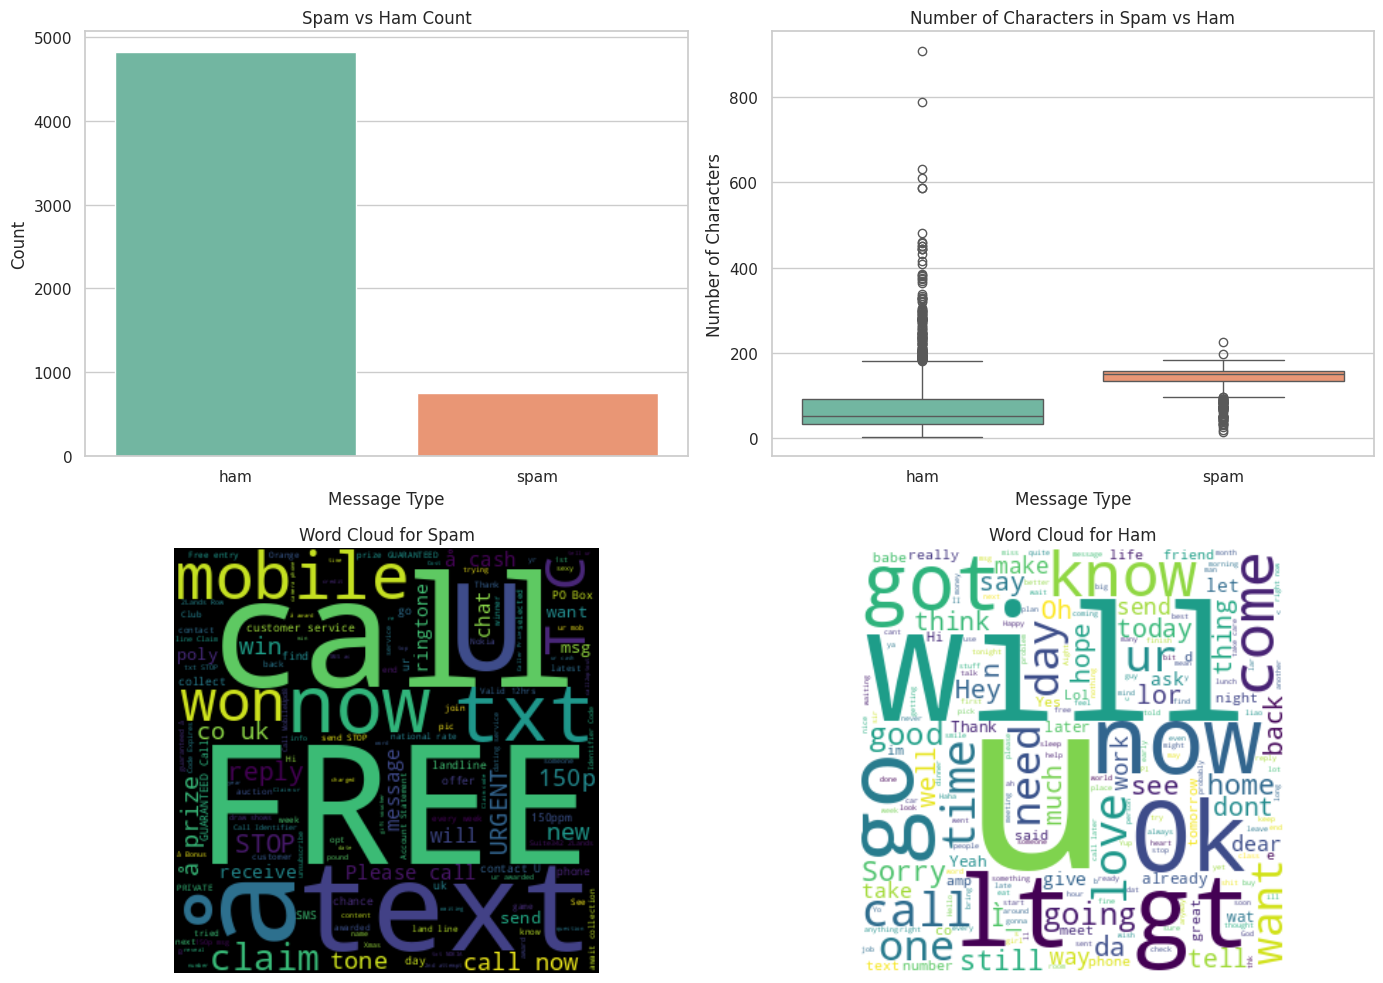

In [24]:
# (1) Import and visualize the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Load the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
print("HEAD OF THE DATASET")
print(df.head())
print("INFO OF THE DATASET")
print(df.info())
print("DESCRIBE OF THE DATASET")
print(df.describe())
print("TAIL OF THE DATASET")
print(df.tail())
print("SHAPE OF THE DATASET")
print(df.shape)

# Drop unwanted columns and rename the useful ones
df_cleaned = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df_cleaned.columns = ['label', 'text']

# Add a new column showing the number of characters in each text message
df_cleaned['num_characters'] = df_cleaned['text'].apply(len)

# Encoding the label: ham = 0, spam = 1
df_cleaned['label_encoded'] = df_cleaned['label'].map({'ham': 0, 'spam': 1})

# Display the first few rows of the cleaned dataset
print("Cleaned dataset:")
print(df_cleaned.head())

# 2. Visualizations

# Set up the style
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Spam vs Ham Distribution (Bar Plot)
sns.countplot(x='label', data=df_cleaned, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Spam vs Ham Count')
axes[0, 0].set_xlabel('Message Type')
axes[0, 0].set_ylabel('Count')

# Box plot of number of characters in spam vs ham
sns.boxplot(x='label', y='num_characters', data=df_cleaned, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Number of Characters in Spam vs Ham')
axes[0, 1].set_xlabel('Message Type')
axes[0, 1].set_ylabel('Number of Characters')

# Word cloud for spam messages
spam_words = ' '.join(df_cleaned[df_cleaned['label'] == 'spam']['text'])
spam_wc = WordCloud(width=300, height=300, background_color='black').generate(spam_words)
axes[1, 0].imshow(spam_wc, interpolation='bilinear')
axes[1, 0].axis('off')
axes[1, 0].set_title('Word Cloud for Spam')

# Word cloud for ham messages
ham_words = ' '.join(df_cleaned[df_cleaned['label'] == 'ham']['text'])
ham_wc = WordCloud(width=300, height=300, background_color='white').generate(ham_words)
axes[1, 1].imshow(ham_wc, interpolation='bilinear')
axes[1, 1].axis('off')
axes[1, 1].set_title('Word Cloud for Ham')

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
# (2)Data cleaning – Check for null values,
#                    Delete the unwanted columns,
#                    Rename the columns, Encode the target variable, Check for duplicate values.
# 1. Check for null values
print("Null values in each column before cleaning:")
print(df.isnull().sum())

# 2. Delete unwanted columns (Unnamed columns)
df_cleaned = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# 3. Rename columns for better clarity
df_cleaned.columns = ['label', 'text']

# 4. Encode the target variable ('ham' as 0, 'spam' as 1)
df_cleaned['label_encoded'] = df_cleaned['label'].map({'ham': 0, 'spam': 1})

# 5. Check for duplicate values
print(f"Number of duplicate rows: {df_cleaned.duplicated().sum()}")

# 6. remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Display the cleaned dataframe
print("Cleaned Dataframe:")
print(df_cleaned.head())

Null values in each column before cleaning:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64
Number of duplicate rows: 403
Cleaned Dataframe:
  label                                               text  label_encoded
0   ham  Go until jurong point, crazy.. Available only ...              0
1   ham                      Ok lar... Joking wif u oni...              0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...              1
3   ham  U dun say so early hor... U c already then say...              0
4   ham  Nah I don't think he goes to usf, he lives aro...              0


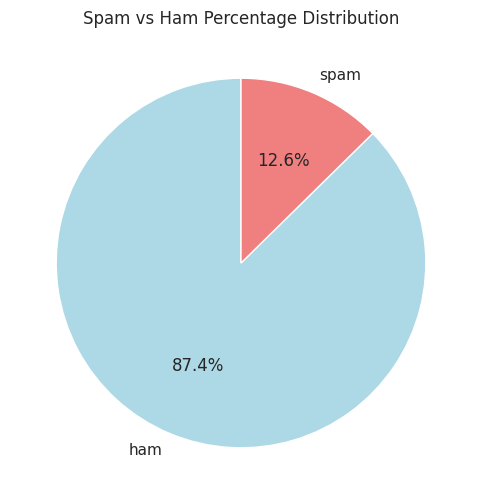

In [9]:
# (3)Exploratory data analysis – How many data are spam and ham in the given data(plot the percentage as pie chart )

# Exploratory Data Analysis: Count of 'spam' and 'ham' messages
label_counts = df_cleaned['label'].value_counts()

# Plotting the percentage of spam vs ham as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Spam vs Ham Percentage Distribution')
plt.show()

In [11]:
#(4)For text processing use nltk library, Make a new column showing the number
# of characters in each text data. Use - pip install nltk, nltk.download(‘punkt’), df[column_name].apply(len)
# Install NLTK (if not already installed)
# !pip install nltk

import nltk

# Download 'punkt' from NLTK
nltk.download('punkt')

# 1. Make a new column showing the number of characters in each text
df_cleaned['num_characters'] = df_cleaned['text'].apply(len)

# Display the first few rows to verify
print(df_cleaned[['text', 'num_characters']].head())



                                                text  num_characters
0  Go until jurong point, crazy.. Available only ...             111
1                      Ok lar... Joking wif u oni...              29
2  Free entry in 2 a wkly comp to win FA Cup fina...             155
3  U dun say so early hor... U c already then say...              49
4  Nah I don't think he goes to usf, he lives aro...              61


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
#(5)Data preprocessing – Lower case, Tokenization, Removing special characters, Remove stop words and apply stemming.
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the Porter Stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words and apply stemming
    tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply the preprocessing function to the text column
df_cleaned['processed_text'] = df_cleaned['text'].apply(preprocess_text)

# Display the first few rows of the cleaned DataFrame
print(df_cleaned[['text', 'processed_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                      processed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


In [13]:
# (6)Now there should be Targets which are label encoded and the text which has been pre-processed.

# Encode the target variable ('ham' as 0, 'spam' as 1)
df_cleaned['label_encoded'] = df_cleaned['label'].map({'ham': 0, 'spam': 1})

# Select relevant columns
final_df = df_cleaned[['label_encoded', 'processed_text']]

# Display the first few rows of the final DataFrame
print(final_df.head())


   label_encoded                                     processed_text
0              0  go jurong point crazi avail bugi n great world...
1              0                              ok lar joke wif u oni
2              1  free entri wkli comp win fa cup final tkt st m...
3              0                u dun say earli hor u c alreadi say
4              0          nah dont think goe usf live around though


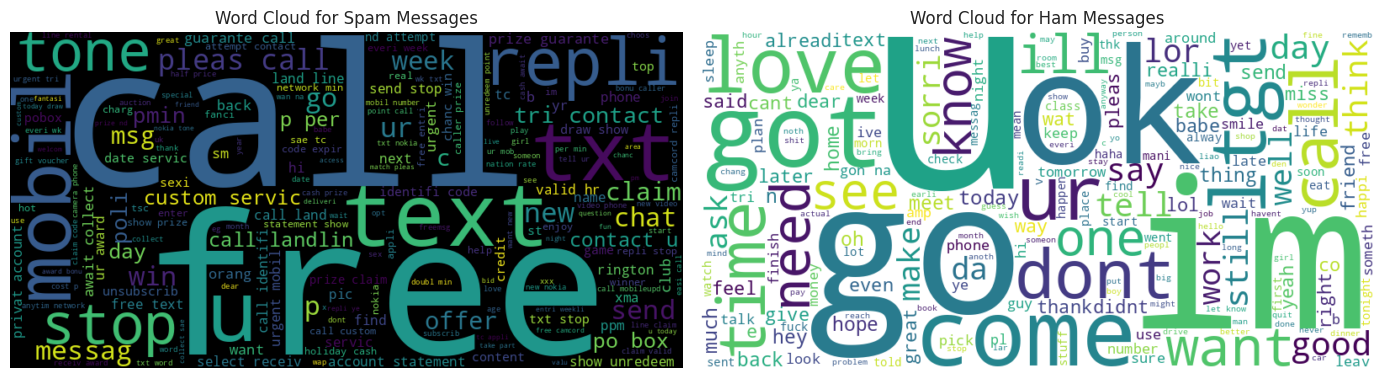

In [14]:
#(7)Use Word Cloud to plot the words commonly used in spam text and ham text.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for spam messages
spam_words = ' '.join(df_cleaned[df_cleaned['label'] == 'spam']['processed_text'])
spam_wc = WordCloud(width=800, height=400, background_color='black').generate(spam_words)

# Word cloud for ham messages
ham_words = ' '.join(df_cleaned[df_cleaned['label'] == 'ham']['processed_text'])
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

# Plotting the word clouds
plt.figure(figsize=(14, 7))

# Spam word cloud
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')

# Ham word cloud
plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')

plt.tight_layout()
plt.show()


In [15]:
#(8)Convert the text to numbers( vectorize) use bag of words or TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the processed text to obtain the TF-IDF matrix
X = vectorizer.fit_transform(final_df['processed_text'])

# Display the shape of the resulting TF-IDF matrix
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (5169, 7050)


In [16]:
#(9)Now before giving the data to the model make sure the
#X is the vectorized pre-processed text and y is the targets which are encoded
# Define the features and target variable
X = vectorizer.fit_transform(final_df['processed_text'])  # TF-IDF matrix
y = final_df['label_encoded']  # Encoded labels

# Display the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)



Shape of X (features): (5169, 7050)
Shape of y (target): (5169,)


In [17]:
#(10)Do train test split.
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4135, 7050)
Shape of X_test: (1034, 7050)
Shape of y_train: (4135,)
Shape of y_test: (1034,)


In [18]:
#(11)Apply naïve bayes, KNN , Decision tree, Random forest and compare the accuracy.
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
models = {
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Store the accuracy of each model
accuracy_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_results[model_name] = accuracy  # Store the accuracy

# Print the accuracy results
for model_name, accuracy in accuracy_results.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")


Naive Bayes Accuracy: 0.9613
KNN Accuracy: 0.9043
Decision Tree Accuracy: 0.9487
Random Forest Accuracy: 0.9691
